# Natural Language ToolKit (NLTK)

In [2]:
import nltk

In [1]:
import json
with open('quotes.json', 'r') as f:
    quotes = json.load(f)
quotes[0]

{'quote': "Don't cry because it's over, smile because it happened.",
 'author': 'Dr. Seuss',
 'tags': ['attributed-no-source',
  'cry',
  'crying',
  'experience',
  'happiness',
  'joy',
  'life',
  'misattributed-dr-seuss',
  'optimism',
  'sadness',
  'smile',
  'smiling'],
 'likes': '190302'}

# Tokenization

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize

i = 'yes'
for quote in quotes:
    quote = quote['quote']
    if i.lower().startswith('y'):
        sentences = sent_tokenize(quote)
        for sentence in sentences:
            print("Un-Tokenized Sentence: ", sentence)
            words = word_tokenize(sentence)
            print("Tokenized Words:", words)
    else:
        break
    print('***'*10)
    i = input("Continue? ")

Un-Tokenized Sentence:  Don't cry because it's over, smile because it happened.
Tokenized Words: ['Do', "n't", 'cry', 'because', 'it', "'s", 'over', ',', 'smile', 'because', 'it', 'happened', '.']
******************************
Continue? y
Un-Tokenized Sentence:  I'm selfish, impatient and a little insecure.
Tokenized Words: ['I', "'m", 'selfish', ',', 'impatient', 'and', 'a', 'little', 'insecure', '.']
Un-Tokenized Sentence:  I make mistakes, I am out of control and at times hard to handle.
Tokenized Words: ['I', 'make', 'mistakes', ',', 'I', 'am', 'out', 'of', 'control', 'and', 'at', 'times', 'hard', 'to', 'handle', '.']
Un-Tokenized Sentence:  But if you can't handle me at my worst, then you sure as hell don't deserve me at my best.
Tokenized Words: ['But', 'if', 'you', 'ca', "n't", 'handle', 'me', 'at', 'my', 'worst', ',', 'then', 'you', 'sure', 'as', 'hell', 'do', "n't", 'deserve', 'me', 'at', 'my', 'best', '.']
******************************
Continue? y
Un-Tokenized Sentence:  Be

# Custom Tokenizers

In [17]:
custom_sentence = "My email addresses are: abc@gmail.com qwerty@gmail.com"
word_tokenize(custom_sentence)

['My',
 'email',
 'addresses',
 'are',
 ':',
 'abc',
 '@',
 'gmail.com',
 'qwerty',
 '@',
 'gmail.com']

In [18]:
from nltk.tokenize import RegexpTokenizer
regex_tokenizer = RegexpTokenizer(r'\w+@\w+\.\w+')
regex_tokenizer.tokenize(custom_sentence)

['abc@gmail.com', 'qwerty@gmail.com']

# Stopwords, Punctuation, LowerCase

In [9]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
len(stop_words)

179

In [12]:
import string
punctuation = list(string.punctuation)
''.join(punctuation)

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
print(quotes[0]['quote'])
quote_words = word_tokenize(quotes[0]['quote'])
cleaned_quote = [w for w in quote_words if (w not in stop_words and w not in punctuation)]
cleaned_quote

Don't cry because it's over, smile because it happened.


['Do', "n't", 'cry', "'s", 'smile', 'happened']

# Stemming, Lemmatization

In [19]:
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk import WordNetLemmatizer

ps = PorterStemmer()
ss = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

In [20]:
ps.stem("Running")

'run'

In [33]:
ps.stem("Lately")

'late'

In [32]:
lemmatizer.lemmatize("ran", 'v')

'run'

In [34]:
lemmatizer.lemmatize("better", 'a')

'good'

# Bag of Words

In [25]:
all_quotes = []
for q in quotes:
    q = q['quote']
    for sent in sent_tokenize(q):
        all_quotes.append(sent)

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
vec = cv.fit_transform(all_quotes)

In [36]:
print(vec)

  (0, 261)	1
  (0, 554)	1
  (0, 448)	1
  (0, 328)	2
  (0, 50)	2
  (0, 125)	1
  (0, 154)	1
  (1, 317)	1
  (1, 360)	1
  (1, 23)	1
  (1, 303)	1
  (1, 532)	1
  (2, 260)	1
  (2, 622)	1
  (2, 266)	1
  (2, 621)	1
  (2, 41)	1
  (2, 120)	1
  (2, 430)	1
  (2, 446)	1
  (2, 21)	1
  (2, 401)	1
  (2, 380)	1
  (2, 23)	1
  (3, 65)	1
  :	:
  (226, 612)	1
  (226, 212)	1
  (226, 675)	2
  (226, 695)	1
  (226, 219)	1
  (226, 679)	1
  (226, 405)	1
  (226, 426)	1
  (226, 376)	1
  (226, 25)	1
  (226, 707)	2
  (226, 602)	2
  (226, 308)	1
  (226, 603)	1
  (226, 326)	1
  (226, 90)	1
  (226, 300)	1
  (227, 329)	1
  (227, 306)	1
  (227, 463)	1
  (227, 704)	1
  (227, 426)	1
  (227, 522)	1
  (227, 603)	1
  (227, 326)	1


In [28]:
cv.vocabulary_

{'don': 154,
 'cry': 125,
 'because': 50,
 'it': 328,
 'over': 448,
 'smile': 554,
 'happened': 261,
 'selfish': 532,
 'impatient': 303,
 'and': 23,
 'little': 360,
 'insecure': 317,
 'make': 380,
 'mistakes': 401,
 'am': 21,
 'out': 446,
 'of': 430,
 'control': 120,
 'at': 41,
 'times': 621,
 'hard': 266,
 'to': 622,
 'handle': 260,
 'but': 86,
 'if': 300,
 'you': 719,
 'can': 90,
 'me': 390,
 'my': 410,
 'worst': 710,
 'then': 606,
 'sure': 589,
 'as': 37,
 'hell': 278,
 'deserve': 134,
 'best': 65,
 'be': 46,
 'yourself': 722,
 'everyone': 183,
 'else': 168,
 'is': 326,
 'already': 19,
 'taken': 593,
 'two': 643,
 'things': 610,
 'are': 30,
 'infinite': 313,
 'the': 603,
 'universe': 649,
 'human': 295,
 'stupidity': 585,
 'not': 424,
 'about': 3,
 'so': 555,
 'many': 384,
 'books': 73,
 'time': 620,
 'who': 686,
 'say': 520,
 'what': 680,
 'feel': 207,
 'those': 613,
 'mind': 396,
 'matter': 388,
 'room': 508,
 'without': 697,
 'like': 357,
 'body': 71,
 'soul': 567,
 've': 656,
 '

In [29]:
vec.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [74]:
cv.inverse_transform(vec.toarray()[0])

[array(['because', 'cry', 'don', 'happened', 'it', 'over', 'smile'],
       dtype='<U15')]


## Parts Of Speech (POS) Tagging
## Named Entity Recognition (NER)

In [59]:
q = quotes[100]['quote']
print(q)
tokenized_q = word_tokenize(q)
pos_tagged = nltk.pos_tag(tokenized_q)
pos_tagged[:10]

I no longer believed in the idea of soul mates, or love at first sight. But I was beginning to believe that a very few times in your life, if you were lucky, you might meet someone who was exactly right for you. Not because he was perfect, or because you were, but because your combined flaws were arranged in a way that allowed two separate beings to hinge together.


[('I', 'PRP'),
 ('no', 'RB'),
 ('longer', 'RBR'),
 ('believed', 'VBN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('idea', 'NN'),
 ('of', 'IN'),
 ('soul', 'NN'),
 ('mates', 'NNS')]

In [43]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [44]:
sents = brown.sents(categories='government')
len(sents)

3032

In [53]:
sents[0]

['The',
 'Office',
 'of',
 'Business',
 'Economics',
 '(',
 'OBE',
 ')',
 'of',
 'the',
 'U.S.',
 'Department',
 'of',
 'Commerce',
 'provides',
 'basic',
 'measures',
 'of',
 'the',
 'national',
 'economy',
 'and',
 'current',
 'analysis',
 'of',
 'short-run',
 'changes',
 'in',
 'the',
 'economic',
 'situation',
 'and',
 'business',
 'outlook',
 '.']

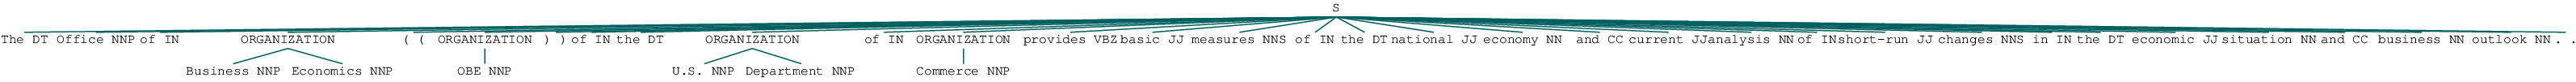

In [52]:
nltk.ne_chunk(nltk.pos_tag(sents[0]))

# N-Grams

In [58]:
from nltk import bigrams, trigrams, ngrams

print(list(bigrams(["Hi", "How", "are", "you"])))
print(list(trigrams(["Hi", "How", "are", "you"])))

[('Hi', 'How'), ('How', 'are'), ('are', 'you')]
[('Hi', 'How', 'are'), ('How', 'are', 'you')]


In [62]:
cv = CountVectorizer(ngram_range=(1,3))
vec = cv.fit_transform(all_quotes)
len(cv.vocabulary_)

4482

# TF-IDF
- Term Frequency - Inverse Document Frequency

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2))
weighted_vec = tfidf.fit_transform(all_quotes)

In [67]:
len(tfidf.vocabulary_)

2540

In [72]:
w = weighted_vec.toarray()[0]
w[w!=0]

array([0.31923321, 0.46867695, 0.23433847, 0.24769478, 0.16997656,
       0.24769478, 0.24769478, 0.25257847, 0.24769478, 0.24769478,
       0.21551382, 0.24769478, 0.23433847, 0.24769478])